In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import warnings
import torch
warnings.filterwarnings("ignore")

from doclayout_yolo import YOLOv10

In [2]:
img_list = []
data_path = "data/"

for filename in os.listdir(data_path):
    temp = filename.lower()
    if temp.endswith(".jpg") or temp.endswith(".png"):
        img_list.append(os.path.join(data_path, filename))

In [3]:
print(f"Found {len(img_list)} images in {data_path}")

Found 6 images in data/


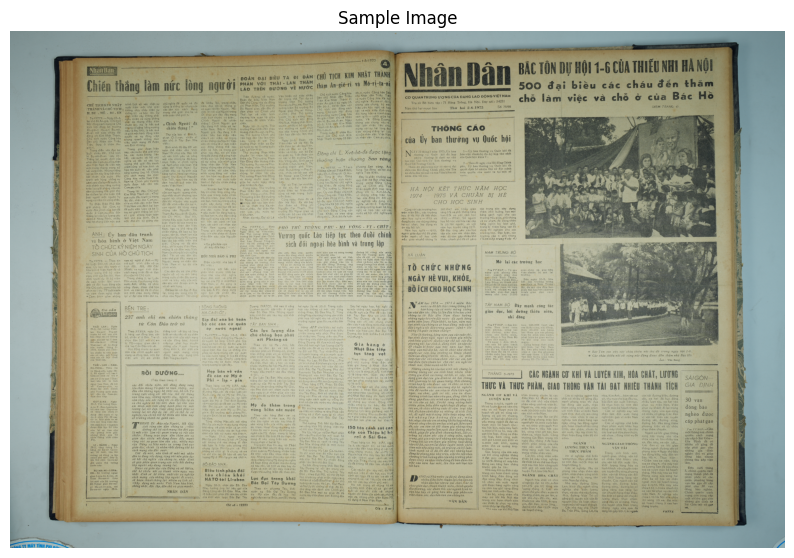

In [4]:
# plot image on this cell
sample = img_list[0]
img = cv2.imread(sample)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Sample Image")
plt.show()

In [6]:
model = YOLOv10(
    model = 'checkpoint/doclayout_yolo_docstructbench_imgsz1024.pt'
).to(device='cuda' if torch.cuda.is_available() else 'cpu')
names = model.names
abandons = [i for i, n in names.items() if n == "abandon"][0]
keep_ids = [i for i in names if i != abandons]

In [7]:
pred = model.predict(
    img_list[0], 
    classes = keep_ids
)


image 1/1 /data_hdd_16t/duydang/nxscan/data/page_3-4c3f09b4-0bfc-448f-94ea-2e1f4dc42199.JPG: 704x1024 12 titles, 61 plain texts, 4 figures, 1 figure_caption, 74.7ms
Speed: 9.1ms preprocess, 74.7ms inference, 117.8ms postprocess per image at shape (1, 3, 704, 1024)


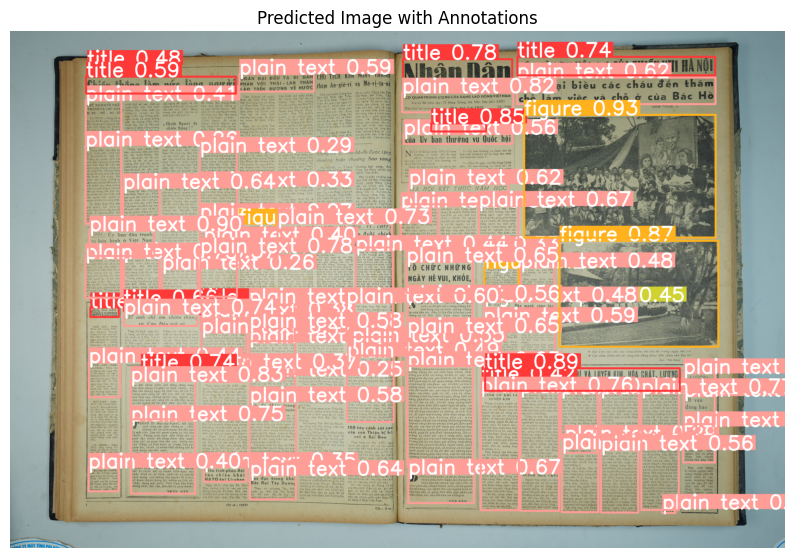

In [8]:
img = pred[0].plot()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Predicted Image with Annotations")
plt.show()

In [9]:
xyxy = pred[0].boxes.xyxy.data
x1, y1 = int(xyxy[:,0].min()), int(xyxy[:,1].min())
x2, y2 = int(xyxy[:,2].max()), int(xyxy[:,3].max())

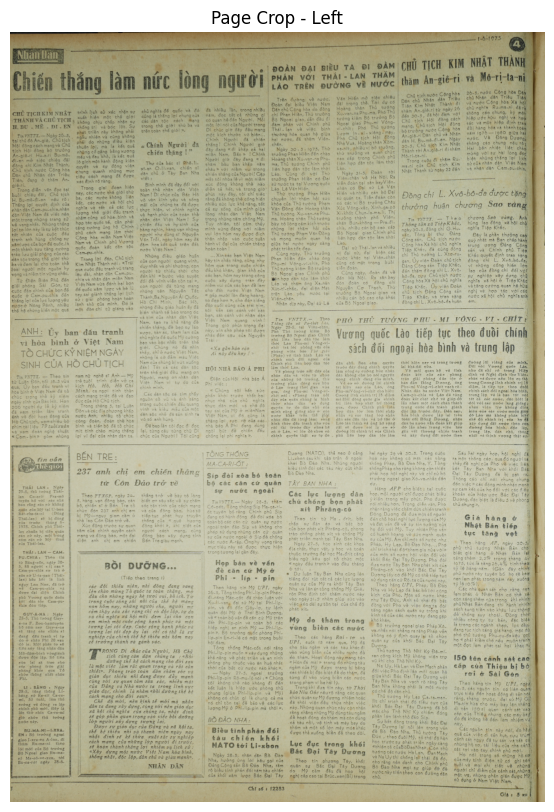

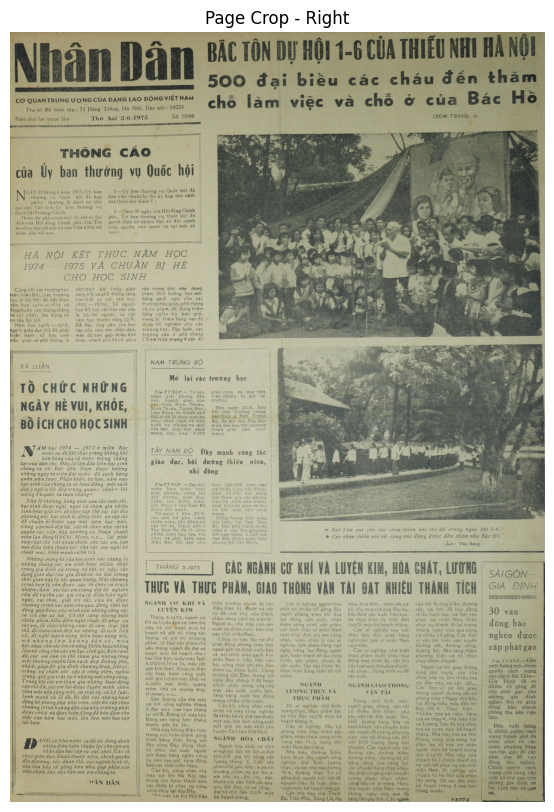

In [10]:
img = cv2.imread(sample)
crop = img[y1:y2, x1:x2]

mid = crop.shape[1] // 2
pages = {'Left': crop[:, :mid], 'Right': crop[:, mid:]}

for side, page in pages.items():
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(page, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Page Crop - {side}")
    plt.show()

In [11]:
# Save the cropped pages
output_dir = "output"
output_dir = os.path.join(output_dir, sample.split('/')[-1].split('.')[0])
os.makedirs(output_dir, exist_ok=True)
for side, page in pages.items():
    output_path = os.path.join(output_dir, f"{side}.jpg")
    cv2.imwrite(output_path, page)
    print(f"Saved {side} page crop to {output_path}")

Saved Left page crop to output/page_3-4c3f09b4-0bfc-448f-94ea-2e1f4dc42199/Left.jpg
Saved Right page crop to output/page_3-4c3f09b4-0bfc-448f-94ea-2e1f4dc42199/Right.jpg
